# $U(1)$ Gauge Model using L2HMC in graph mode

--------------------------------------------------------------------
### TODO:
* [ ] Look at performance on Cooley (longer training runs).
* [ ] Fit observables to Eq. \ref{eq:therm_time} to determine the thermalization time $\tau$.

\begin{equation} 
f(t) \equiv A \exp^{-t / \tau}+ \,\, B
\label{eq:therm_time}
\end{equation}
* [ ] Look at defining a distance metric as the difference in topological charge between two samples and see what effect adding this as an additional term to the loss function has on the models' ability to tunnel between topological sectors.

--------------------------------------------------------------------

In [1]:
import os
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.special import i0, i1

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import utils.gauge_model_helpers as helpers
from utils.data_utils import (
    calc_avg_vals_errors, block_resampling, jackknife_err
)
from gauge_model import (
    GaugeModel, check_else_make_dir, save_params_to_pkl_file
)

tfe = tf.contrib.eager
%autoreload 2
%matplotlib notebook

#from gauge_model import GaugeModel
#%reload_ext gauge_model.GaugeModel
#from gauge_model import GaugeModel
#
#from dynamics.gauge_dynamics import GaugeDynamics
#%reload_ext dynamics.gauge_dynamics
#from dynamics.gauge_dynamics import GaugeDynamics

## Define parameters

In [2]:
params = {
#--------------------- Lattice parameters ----------------------------
    'time_size': 16,
    'space_size': 16,
    'link_type': 'U1',
    'dim': 2,
    'num_samples': 4,
    'rand': False,
    'data_format': 'channels_last',
#--------------------- Leapfrog parameters ---------------------------
    'num_steps': 1,
    'eps': 0.2,
    'loss_scale': 0.1,
    'loss_eps': 1e-4,
#--------------------- Learning rate parameters ----------------------
    'learning_rate_init': 1e-3,
    'learning_rate_decay_steps': 500,
    'learning_rate_decay_rate': 0.96,
#--------------------- Annealing rate parameters ---------------------
    'annealing': True,
    'annealing_steps': 500,
    'annealing_factor': 0.9999,
    #'beta': 3.,
    'beta_init': 2.,
    'beta_final': 8.,
#--------------------- Training parameters ---------------------------
    'train_steps': 20000,
    'save_steps': 1000,
    'logging_steps': 50,
    'print_steps': 1
    'training_samples_steps': 1000,
    'training_samples_length': 100,
#--------------------- Model parameters ------------------------------
    'conv_net': True,
    'hmc': False,
    'eps_trainable': True,
    'metric': 'l2',
    'aux': True,
    'clip_grads': False,
    'clip_value': 10.,
}

## Create model

In [3]:
#os.environ["KMP_BLOCKTIME"] = str(0)
#os.environ["KMP_SETTINGS"] = str(1)
#os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1,0"
#os.environ["OMP_NUM_THREADS"] = str(2)

config = tf.ConfigProto()
tf.reset_default_graph()

In [4]:
model = GaugeModel(params=params, 
                   config=config,
                   sess=None,
                   log_dir=None,
                   restore=False)

save_params_to_pkl_file(params, model.info_dir)

Creating directory for new run: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_88/
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_88/samples_history.
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_88/samples_history/training.
Creating directory: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_88/train_samples.
time_size: 16
space_size: 16
link_type: U1
dim: 2
num_samples: 4
rand: False
data_format: channels_last
num_steps: 1
eps: 0.2
loss_scale: 0.1
loss_eps: 0.0001
learning_rate_init: 0.001
learning_rate_decay_steps: 500
learning_rate_decay_rate: 0.96
annealing: True
annealing_steps: 500
annealing_factor: 0.9999
beta_init: 2.0
beta_final: 8.0
train_steps: 20000
save_steps: 1000
logging_steps: 50
training_samples_steps: 1000
training_samples_length: 100
conv_net: True
hmc: False
eps_trainable: True
metric: l2
aux: True
clip_grads: False
clip_value: 10.0
--------------------------------------------------------------------------------

Building grap

In [ ]:
model.train(model.train_steps, kill_sess=False)

----------------------------------------------------------------------------------------------------
     STEP           LOSS       TIME/STEP      ACCEPT %        EPS           BETA           LR      
----------------------------------------------------------------------------------------------------
     0/20000    -1.018e+05       495.1       0.006442         0.2            2           0.001    
     1/20000    -1.327e+05      0.8006        0.4405         0.199           2           0.001    
     2/20000    -5.216e+04      0.6026          0.5         0.1982           2           0.001    
     3/20000    -1.107e+05      0.4457         0.75         0.1977         2.001         0.001    
     4/20000    -8.495e+04      0.6024        0.6325        0.1975         2.001         0.001    
     5/20000    -1.033e+05      0.5989        0.08558       0.1971         2.001         0.001    
     6/20000    -9.212e+04      0.5331        0.2513         0.197         2.001         0.001    
     

    80/20000    -1.061e+05      0.3669        0.6059        0.1925         2.016         0.001    
    81/20000    -1.116e+05      0.5323        0.8866        0.1923         2.016         0.001    
    82/20000    -1.064e+05      0.4515        0.5368        0.1921         2.016         0.001    
    83/20000    -1.091e+05      0.3647        0.6107        0.1921         2.017         0.001    
    84/20000    -1.057e+05       0.637        0.7863         0.192         2.017         0.001    
    85/20000    -1.175e+05      0.8642           1          0.1919         2.017         0.001    
    86/20000    -1.081e+05      0.7516        0.8007        0.1918         2.017         0.001    
    87/20000    -1.052e+05      0.9289        0.5186        0.1917         2.017         0.001    
    88/20000    -1.088e+05      0.6507        0.6942        0.1915         2.018         0.001    
    89/20000    -1.079e+05      0.9201        0.5316        0.1914         2.018         0.001    
    90/200

   163/20000    -1.084e+05      0.6676         0.473        0.1782         2.033         0.001    
   164/20000    -1.047e+05      0.6158        0.8815        0.1779         2.033         0.001    
   165/20000    -1.061e+05      0.5236        0.7025        0.1776         2.033         0.001    
   166/20000    -1.092e+05      0.6397        0.6266        0.1772         2.033         0.001    
   167/20000    -1.067e+05      0.6703        0.5248        0.1769         2.034         0.001    
   168/20000    -1.079e+05      0.6412        0.7959        0.1766         2.034         0.001    
   169/20000    -1.063e+05      0.7831        0.9347        0.1763         2.034         0.001    
   170/20000    -1.085e+05      0.6723        0.8955         0.176         2.034         0.001    
   171/20000    -1.055e+05      0.4932        0.8838        0.1757         2.034         0.001    
   172/20000    -1.046e+05      0.5124        0.7248        0.1754         2.035         0.001    
   173/200

   246/20000    -9.812e+04       0.487        0.7721        0.1699         2.05          0.001    
   247/20000    -1.065e+05        0.5         0.8484        0.1698         2.05          0.001    
   248/20000    -1.072e+05       0.527         0.693        0.1698         2.05          0.001    
   249/20000    -1.109e+05      0.7488        0.8785        0.1697         2.05          0.001    
   250/20000    -9.589e+04      0.6752        0.6997        0.1696         2.051         0.001    
   251/20000    -1.058e+05      0.4376        0.9249        0.1695         2.051         0.001    
   252/20000    -1.045e+05      0.4223        0.4793        0.1694         2.051         0.001    
   253/20000    -1.056e+05      0.4281        0.6736        0.1693         2.051         0.001    
   254/20000    -1.064e+05       0.441        0.8581        0.1691         2.051         0.001    
   255/20000     -1.05e+05      0.4257        0.6411         0.169         2.052         0.001    
   256/200

   329/20000    -1.028e+05       0.378        0.7033        0.1583         2.067         0.001    
   330/20000     -1.02e+05      0.4205           1          0.1581         2.067         0.001    
   331/20000     -1.05e+05      0.4321        0.7766        0.1581         2.067         0.001    
   332/20000     -1.05e+05      0.4449        0.8104        0.1581         2.068         0.001    
   333/20000    -1.041e+05      0.3774        0.8639        0.1581         2.068         0.001    
   334/20000     -1.01e+05       0.356        0.6669        0.1581         2.068         0.001    
   335/20000    -1.043e+05      0.3695        0.7435         0.158         2.068         0.001    
   336/20000    -1.056e+05      0.3767        0.9182        0.1579         2.068         0.001    
   337/20000    -1.085e+05      0.3671        0.7631        0.1578         2.069         0.001    
   338/20000     -1.02e+05      0.3627        0.6248        0.1577         2.069         0.001    
   339/200

   412/20000    -1.052e+05      0.5914         0.874         0.159         2.084         0.001    
   413/20000     -1.04e+05      0.6881        0.8272         0.159         2.084         0.001    
   414/20000    -1.001e+05      0.4928         0.736         0.159         2.085         0.001    
   415/20000    -1.053e+05       0.701        0.7216         0.159         2.085         0.001    
   416/20000    -9.906e+04      0.7246        0.8863         0.159         2.085         0.001    
   417/20000    -1.066e+05      0.5137        0.9545        0.1593         2.085         0.001    
   418/20000    -1.002e+05      0.5608        0.8013        0.1596         2.085         0.001    
   419/20000    -1.039e+05       0.586        0.8605        0.1599         2.086         0.001    
   420/20000    -1.039e+05      0.6024        0.7696        0.1602         2.086         0.001    
   421/20000    -1.036e+05      0.4153        0.6245        0.1604         2.086         0.001    
   422/200

   495/20000    -1.087e+05      0.7571        0.9011        0.1627         2.101         0.001    
   496/20000    -1.029e+05      0.6417        0.8358        0.1625         2.102         0.001    
   497/20000     -1.06e+05      0.6619        0.8612        0.1624         2.102         0.001    
   498/20000    -1.076e+05      0.8235         0.877        0.1622         2.102         0.001    
   499/20000    -1.074e+05       1.018        0.8428        0.1621         2.102         0.001    
   500/20000     -9.9e+04       0.7328        0.8741         0.162         2.103        0.00096   
   501/20000    -1.101e+05      0.8576        0.7629        0.1623         2.103        0.00096   
   502/20000    -1.039e+05      0.8119         0.624        0.1626         2.103        0.00096   
   503/20000    -1.028e+05      0.9426        0.7524        0.1629         2.103        0.00096   
   504/20000    -1.018e+05      0.7399        0.7004        0.1631         2.103        0.00096   
   505/200

   578/20000    -1.059e+05      0.5467        0.6216        0.1606         2.119        0.00096   
   579/20000     -1.04e+05      0.4217        0.9601        0.1606         2.119        0.00096   
   580/20000    -1.037e+05      0.5608        0.5903        0.1605         2.119        0.00096   
   581/20000    -1.071e+05      0.5322        0.8949        0.1605         2.12         0.00096   
   582/20000     -1.09e+05      0.6132        0.7553        0.1604         2.12         0.00096   
   583/20000    -9.815e+04      0.5429         0.829        0.1603         2.12         0.00096   
   584/20000    -1.053e+05      0.5773        0.7436        0.1603         2.12         0.00096   
   585/20000    -1.054e+05      0.6372        0.9388        0.1601         2.12         0.00096   
   586/20000     -1.02e+05      0.4338        0.7082        0.1601         2.121        0.00096   
   587/20000    -1.068e+05       0.66         0.7847        0.1599         2.121        0.00096   
   588/200

   661/20000    -9.871e+04      0.6405        0.6052        0.1639         2.137        0.00096   
   662/20000    -1.013e+05      0.6639        0.9451        0.1638         2.137        0.00096   
   663/20000    -1.137e+05      0.4493         0.925        0.1639         2.137        0.00096   
   664/20000    -1.025e+05      0.6226        0.7782         0.164         2.137        0.00096   
   665/20000    -1.082e+05      0.5433        0.6503         0.164         2.138        0.00096   
   666/20000    -9.957e+04      0.5121        0.7495         0.164         2.138        0.00096   
   667/20000    -1.063e+05       0.486        0.6731        0.1642         2.138        0.00096   
   668/20000    -1.047e+05      0.5674        0.7218        0.1643         2.138        0.00096   
   669/20000     -1.01e+05      0.5598        0.6572        0.1648         2.138        0.00096   
   670/20000     -1.03e+05      0.4988        0.8345        0.1652         2.139        0.00096   
   671/200

   744/20000    -1.018e+05      0.5232        0.7165        0.1606         2.154        0.00096   
   745/20000    -9.972e+04      0.6072        0.6839        0.1605         2.155        0.00096   
   746/20000    -1.051e+05      0.6568        0.9245        0.1605         2.155        0.00096   
   747/20000    -1.031e+05      0.4329        0.6323        0.1604         2.155        0.00096   
   748/20000    -1.047e+05      0.6321        0.7391        0.1603         2.155        0.00096   
   749/20000    -1.056e+05      0.6352        0.7865        0.1602         2.156        0.00096   
   750/20000    -1.043e+05      0.5059        0.5939        0.1601         2.156        0.00096   
   751/20000    -1.042e+05      0.5591        0.6884        0.1599         2.156        0.00096   
   752/20000    -1.032e+05      0.5848        0.7598        0.1598         2.156        0.00096   
   753/20000    -1.024e+05      0.4244         0.63         0.1602         2.156        0.00096   
   754/200

In [7]:
run_steps = [50, 100, 200, 400, 500, 600, 800, 1000, 2000, 4000, 5000]#, 10000]#, 6000#, 10000]

In [8]:
for steps in run_steps:
    _ = model.run(steps)

Running (trained) L2HMC sampler for 50 steps...
step:      0/50     accept prob (avg):     1     step size: 0.05603 	 time/step: 0.3756

accept prob:  [1. 1. 1. 1.]


step:     10/50     accept prob (avg):     1     step size: 0.05603 	 time/step: 0.1533

accept prob:  [1. 1. 1. 1.]


step:     20/50     accept prob (avg):   0.857   step size: 0.05603 	 time/step: 0.1729

accept prob:  [1.        1.        1.        0.4280334]


step:     30/50     accept prob (avg):  0.5763   step size: 0.05603 	 time/step: 0.1514

accept prob:  [0.6731411  0.44222534 0.510915   0.6790455 ]


step:     40/50     accept prob (avg):  0.9921   step size: 0.05603 	 time/step: 0.1685

accept prob:  [1.        1.        1.        0.9682453]



Samples saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_87/samples_history/samples_history_50.pkl.
Accept probabilities saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_87/samples_history/accept_prob_history_50.pkl.

 Time to complete run: 8.281774044

step:    130/400    accept prob (avg):  0.8034   step size: 0.05603 	 time/step: 0.1693

accept prob:  [0.68097544 1.         0.53281    1.        ]


step:    140/400    accept prob (avg):  0.7221   step size: 0.05603 	 time/step: 0.1595

accept prob:  [0.47339958 0.86933005 0.61652565 0.9292505 ]


step:    150/400    accept prob (avg):  0.6094   step size: 0.05603 	 time/step: 0.1561

accept prob:  [0.501033  0.5097003 1.        0.4270418]


step:    160/400    accept prob (avg):  0.9449   step size: 0.05603 	 time/step: 0.1599

accept prob:  [1.         0.97673315 0.80292404 1.        ]


step:    170/400    accept prob (avg):  0.8641   step size: 0.05603 	 time/step: 0.1585

accept prob:  [1.         1.         0.45620966 1.        ]


step:    180/400    accept prob (avg):  0.8572   step size: 0.05603 	 time/step: 0.1844

accept prob:  [1.         0.7807184  1.         0.64812446]


step:    190/400    accept prob (avg):  0.9238   step size: 0.05603 	 time/step: 0.1532

accept pr

step:    260/500    accept prob (avg):  0.5988   step size: 0.05603 	 time/step: 0.1979

accept prob:  [0.7327906  0.39515406 0.31828976 0.94882256]


step:    270/500    accept prob (avg):  0.7359   step size: 0.05603 	 time/step: 0.1536

accept prob:  [1.         0.91216284 0.5878084  0.44350928]


step:    280/500    accept prob (avg):  0.8875   step size: 0.05603 	 time/step: 0.3732

accept prob:  [0.76519746 0.7848272  1.         1.        ]


step:    290/500    accept prob (avg):  0.6779   step size: 0.05603 	 time/step: 0.2129

accept prob:  [1.        0.3813287 0.5787482 0.7514055]


step:    300/500    accept prob (avg):  0.6325   step size: 0.05603 	 time/step: 0.1704

accept prob:  [0.2782449  0.8601465  0.55977637 0.8316497 ]


step:    310/500    accept prob (avg):  0.8275   step size: 0.05603 	 time/step: 0.1532

accept prob:  [1.         1.         0.58253735 0.727284  ]


step:    320/500    accept prob (avg):   0.828   step size: 0.05603 	 time/step: 0.1492

accept pr

step:    290/600    accept prob (avg):  0.8676   step size: 0.05603 	 time/step: 0.1757

accept prob:  [1.         1.         1.         0.47050226]


step:    300/600    accept prob (avg):  0.8911   step size: 0.05603 	 time/step: 0.166 

accept prob:  [0.9875482 0.5769495 1.        1.       ]


step:    310/600    accept prob (avg):  0.7222   step size: 0.05603 	 time/step: 0.1616

accept prob:  [0.654588  0.613167  0.6208683 1.       ]


step:    320/600    accept prob (avg):  0.9117   step size: 0.05603 	 time/step: 0.1768

accept prob:  [1.         0.64664596 1.         1.        ]


step:    330/600    accept prob (avg):  0.6664   step size: 0.05603 	 time/step: 0.1616

accept prob:  [0.42889425 0.5144823  1.         0.72226685]


step:    340/600    accept prob (avg):  0.7882   step size: 0.05603 	 time/step: 0.1584

accept prob:  [1.         0.43681988 0.88288975 0.8329493 ]


step:    350/600    accept prob (avg):  0.6983   step size: 0.05603 	 time/step: 0.1569

accept prob: 

step:    220/800    accept prob (avg):  0.6729   step size: 0.05603 	 time/step: 0.1439

accept prob:  [0.27649412 1.         0.748655   0.6663995 ]


step:    230/800    accept prob (avg):  0.8484   step size: 0.05603 	 time/step: 0.1406

accept prob:  [1.         1.         0.67344934 0.72028214]


step:    240/800    accept prob (avg):  0.7867   step size: 0.05603 	 time/step: 0.1618

accept prob:  [0.9489915  0.8907607  1.         0.30719113]


step:    250/800    accept prob (avg):  0.8564   step size: 0.05603 	 time/step: 0.1626

accept prob:  [0.8724706 1.        1.        0.5532885]


step:    260/800    accept prob (avg):  0.7971   step size: 0.05603 	 time/step: 0.1603

accept prob:  [0.8766609  0.74781394 0.56408346 1.        ]


step:    270/800    accept prob (avg):  0.8703   step size: 0.05603 	 time/step: 0.1628

accept prob:  [1.        1.        0.4811628 1.       ]


step:    280/800    accept prob (avg):  0.8124   step size: 0.05603 	 time/step: 0.1574

accept prob: 

step:    770/800    accept prob (avg):  0.8104   step size: 0.05603 	 time/step: 0.1866

accept prob:  [0.4270527 1.        0.8145236 1.       ]


step:    780/800    accept prob (avg):  0.8517   step size: 0.05603 	 time/step: 0.1594

accept prob:  [0.40684 1.      1.      1.     ]


step:    790/800    accept prob (avg):  0.8868   step size: 0.05603 	 time/step: 0.1689

accept prob:  [1.         1.         0.93765396 0.60960335]



Samples saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_87/samples_history/samples_history_800.pkl.
Accept probabilities saved to: /Users/saforem2/ANL/l2hmc/gauge_logs_graph/run_87/samples_history/accept_prob_history_800.pkl.

 Time to complete run: 126.69729590415955 seconds.
--------------------------------------------------------------------------------

Running (trained) L2HMC sampler for 1000 steps...
step:      0/1000   accept prob (avg):     1     step size: 0.05603 	 time/step: 0.1595

accept prob:  [1. 1. 1. 1.]


step:     10/1000   acce

step:    500/1000   accept prob (avg):  0.9181   step size: 0.05603 	 time/step: 0.165 

accept prob:  [1.         1.         1.         0.67234045]


step:    510/1000   accept prob (avg):  0.8525   step size: 0.05603 	 time/step: 0.1712

accept prob:  [0.631493   0.77838695 1.         1.        ]


step:    520/1000   accept prob (avg):  0.5945   step size: 0.05603 	 time/step: 0.1541

accept prob:  [0.29869696 0.3009004  1.         0.77855325]


step:    530/1000   accept prob (avg):  0.8402   step size: 0.05603 	 time/step: 0.1465

accept prob:  [1.         0.8580273  0.50296074 1.        ]


step:    540/1000   accept prob (avg):  0.7866   step size: 0.05603 	 time/step: 0.1564

accept prob:  [1.        0.8451589 0.5109306 0.7904478]


step:    550/1000   accept prob (avg):  0.8913   step size: 0.05603 	 time/step: 0.1566

accept prob:  [0.86109203 0.8155185  1.         0.8887514 ]


step:    560/1000   accept prob (avg):  0.6874   step size: 0.05603 	 time/step: 0.1676

accept pr

step:     30/2000   accept prob (avg):   0.943   step size: 0.05603 	 time/step: 0.1474

accept prob:  [1.         1.         1.         0.77195245]


step:     40/2000   accept prob (avg):  0.6719   step size: 0.05603 	 time/step: 0.1399

accept prob:  [0.9943575  0.94177884 0.3744556  0.37716222]


step:     50/2000   accept prob (avg):   0.544   step size: 0.05603 	 time/step: 0.1412

accept prob:  [0.24403499 1.         0.47692326 0.4549422 ]


step:     60/2000   accept prob (avg):  0.7149   step size: 0.05603 	 time/step: 0.1572

accept prob:  [0.73357373 0.66107225 0.56982774 0.8951208 ]


step:     70/2000   accept prob (avg):  0.8067   step size: 0.05603 	 time/step: 0.1583

accept prob:  [0.4865227 0.9683044 1.        0.7718582]


step:     80/2000   accept prob (avg):  0.7602   step size: 0.05603 	 time/step: 0.1494

accept prob:  [1.         0.32918602 0.9809102  0.73058003]


step:     90/2000   accept prob (avg):  0.7373   step size: 0.05603 	 time/step: 0.1517

accept pr

step:    590/2000   accept prob (avg):   0.699   step size: 0.05603 	 time/step: 0.1662

accept prob:  [1.         1.         0.6753462  0.12056302]


step:    600/2000   accept prob (avg):  0.5985   step size: 0.05603 	 time/step: 0.1599

accept prob:  [0.75266397 0.4864039  0.38831416 0.7668104 ]


step:    610/2000   accept prob (avg):  0.9067   step size: 0.05603 	 time/step: 0.1536

accept prob:  [1.        1.        1.        0.6268464]


step:    620/2000   accept prob (avg):  0.8625   step size: 0.05603 	 time/step: 0.1534

accept prob:  [0.9288252 1.        0.5211191 1.       ]


step:    630/2000   accept prob (avg):  0.6295   step size: 0.05603 	 time/step: 0.145 

accept prob:  [0.55552185 0.60569054 0.64566004 0.7111089 ]


step:    640/2000   accept prob (avg):  0.8461   step size: 0.05603 	 time/step: 0.1623

accept prob:  [0.42350957 1.         1.         0.96094006]


step:    650/2000   accept prob (avg):   0.787   step size: 0.05603 	 time/step: 0.1523

accept prob: 

step:   1140/2000   accept prob (avg):   0.764   step size: 0.05603 	 time/step: 0.1876

accept prob:  [0.8147225  0.9104386  0.673124   0.65757126]


step:   1150/2000   accept prob (avg):   0.739   step size: 0.05603 	 time/step: 0.1555

accept prob:  [0.60802406 0.347787   1.         1.        ]


step:   1160/2000   accept prob (avg):  0.9706   step size: 0.05603 	 time/step: 0.1564

accept prob:  [1.        0.961116  1.        0.9212268]


step:   1170/2000   accept prob (avg):  0.8779   step size: 0.05603 	 time/step: 0.1506

accept prob:  [0.73029023 1.         1.         0.78119105]


step:   1180/2000   accept prob (avg):  0.8111   step size: 0.05603 	 time/step: 0.154 

accept prob:  [0.47485858 0.97413844 0.98833203 0.80692804]


step:   1190/2000   accept prob (avg):  0.8718   step size: 0.05603 	 time/step: 0.1516

accept prob:  [0.83320355 1.         1.         0.653949  ]


step:   1200/2000   accept prob (avg):  0.7905   step size: 0.05603 	 time/step: 0.1614

accept pr

step:   1690/2000   accept prob (avg):  0.7242   step size: 0.05603 	 time/step: 0.1537

accept prob:  [0.5312324 1.        0.3655898 1.       ]


step:   1700/2000   accept prob (avg):  0.7731   step size: 0.05603 	 time/step: 0.157 

accept prob:  [0.35811585 0.9061145  1.         0.8282852 ]


step:   1710/2000   accept prob (avg):  0.6538   step size: 0.05603 	 time/step: 0.1595

accept prob:  [1.         0.32457897 0.6019836  0.6888133 ]


step:   1720/2000   accept prob (avg):  0.9248   step size: 0.05603 	 time/step: 0.1609

accept prob:  [1.        1.        0.9893279 0.7100247]


step:   1730/2000   accept prob (avg):  0.6683   step size: 0.05603 	 time/step: 0.1494

accept prob:  [1.         0.43410888 0.3997144  0.83927727]


step:   1740/2000   accept prob (avg):  0.8972   step size: 0.05603 	 time/step: 0.1383

accept prob:  [1.         1.         0.58884674 1.        ]


step:   1750/2000   accept prob (avg):  0.6892   step size: 0.05603 	 time/step: 0.1471

accept prob: 

step:    220/4000   accept prob (avg):  0.5602   step size: 0.05603 	 time/step: 0.1542

accept prob:  [0.53615373 0.64221776 0.5117889  0.55079794]


step:    230/4000   accept prob (avg):  0.8209   step size: 0.05603 	 time/step: 0.1517

accept prob:  [0.68688214 0.59666127 1.         1.        ]


step:    240/4000   accept prob (avg):  0.9001   step size: 0.05603 	 time/step: 0.1547

accept prob:  [0.60033244 1.         1.         1.        ]


step:    250/4000   accept prob (avg):  0.7808   step size: 0.05603 	 time/step: 0.1825

accept prob:  [0.4713669  1.         0.65199286 1.        ]


step:    260/4000   accept prob (avg):  0.7813   step size: 0.05603 	 time/step: 0.1638

accept prob:  [1.        0.4963886 1.        0.6287975]


step:    270/4000   accept prob (avg):  0.7978   step size: 0.05603 	 time/step: 0.163 

accept prob:  [1.         0.56138724 0.6580899  0.97191626]


step:    280/4000   accept prob (avg):  0.8869   step size: 0.05603 	 time/step: 0.1516

accept pr

step:    780/4000   accept prob (avg):  0.9602   step size: 0.05603 	 time/step: 0.1612

accept prob:  [0.97804064 0.86259556 1.         1.        ]


step:    790/4000   accept prob (avg):  0.8357   step size: 0.05603 	 time/step: 0.1469

accept prob:  [0.78857243 1.         1.         0.5542884 ]


step:    800/4000   accept prob (avg):  0.8566   step size: 0.05603 	 time/step: 0.1485

accept prob:  [0.47187066 0.9545683  1.         1.        ]


step:    810/4000   accept prob (avg):  0.8061   step size: 0.05603 	 time/step: 0.1494

accept prob:  [0.70563966 1.         0.5187549  1.        ]


step:    820/4000   accept prob (avg):  0.9452   step size: 0.05603 	 time/step: 0.1602

accept prob:  [0.93111926 0.9279752  0.9217892  1.        ]


step:    830/4000   accept prob (avg):  0.9232   step size: 0.05603 	 time/step: 0.1578

accept prob:  [1.        1.        1.        0.6929035]


step:    840/4000   accept prob (avg):  0.7898   step size: 0.05603 	 time/step: 0.1493

accept pr

step:   1340/4000   accept prob (avg):  0.8604   step size: 0.05603 	 time/step: 0.149 

accept prob:  [1.        1.        0.8358522 0.6055612]


step:   1350/4000   accept prob (avg):  0.8899   step size: 0.05603 	 time/step: 0.1528

accept prob:  [0.9401755 0.6194867 1.        1.       ]


step:   1360/4000   accept prob (avg):  0.8842   step size: 0.05603 	 time/step: 0.1498

accept prob:  [1.        1.        1.        0.5366285]


step:   1370/4000   accept prob (avg):  0.4835   step size: 0.05603 	 time/step: 0.1499

accept prob:  [1.         0.44298396 0.26805955 0.22299798]


step:   1380/4000   accept prob (avg):  0.8005   step size: 0.05603 	 time/step: 0.1493

accept prob:  [1.        0.5453926 0.6564451 1.       ]


step:   1390/4000   accept prob (avg):     1     step size: 0.05603 	 time/step: 0.1572

accept prob:  [1. 1. 1. 1.]


step:   1400/4000   accept prob (avg):  0.8432   step size: 0.05603 	 time/step: 0.1675

accept prob:  [0.6307771 1.        1.        0.742107

step:   1900/4000   accept prob (avg):  0.9229   step size: 0.05603 	 time/step: 0.1516

accept prob:  [1.        1.        1.        0.6915269]


step:   1910/4000   accept prob (avg):   0.786   step size: 0.05603 	 time/step: 0.1507

accept prob:  [0.29045245 1.         0.8534528  1.        ]


step:   1920/4000   accept prob (avg):  0.8573   step size: 0.05603 	 time/step: 0.1586

accept prob:  [0.5559967  1.         1.         0.87302995]


step:   1930/4000   accept prob (avg):  0.8797   step size: 0.05603 	 time/step: 0.1532

accept prob:  [1.         0.7377045  0.931465   0.84948146]


step:   1940/4000   accept prob (avg):  0.8525   step size: 0.05603 	 time/step:  0.15 

accept prob:  [1.         1.         1.         0.41016856]


step:   1950/4000   accept prob (avg):  0.6997   step size: 0.05603 	 time/step: 0.1597

accept prob:  [1.        0.4715108 0.6807261 0.6465868]


step:   1960/4000   accept prob (avg):  0.9701   step size: 0.05603 	 time/step: 0.164 

accept prob: 

step:   2450/4000   accept prob (avg):  0.7633   step size: 0.05603 	 time/step: 0.1446

accept prob:  [0.5407191 1.        0.6558677 0.8566624]


step:   2460/4000   accept prob (avg):  0.9658   step size: 0.05603 	 time/step: 0.1539

accept prob:  [0.9174392 1.        0.9459603 1.       ]


step:   2470/4000   accept prob (avg):  0.8094   step size: 0.05603 	 time/step: 0.1525

accept prob:  [0.7593083  1.         0.5822885  0.89605004]


step:   2480/4000   accept prob (avg):  0.7087   step size: 0.05603 	 time/step: 0.1494

accept prob:  [0.7434223  1.         0.6030715  0.48836482]


step:   2490/4000   accept prob (avg):  0.8182   step size: 0.05603 	 time/step: 0.1513

accept prob:  [1.        0.7097683 1.        0.5630172]


step:   2500/4000   accept prob (avg):  0.8323   step size: 0.05603 	 time/step: 0.1486

accept prob:  [0.9236242  0.8579182  0.54747707 1.        ]


step:   2510/4000   accept prob (avg):  0.9113   step size: 0.05603 	 time/step: 0.1533

accept prob:  [1.

step:   3010/4000   accept prob (avg):  0.7181   step size: 0.05603 	 time/step: 0.1934

accept prob:  [0.5463615  0.57305396 0.79976934 0.9533456 ]


step:   3020/4000   accept prob (avg):  0.8352   step size: 0.05603 	 time/step: 0.1832

accept prob:  [1.         1.         0.34060252 1.        ]


step:   3030/4000   accept prob (avg):  0.7549   step size: 0.05603 	 time/step: 0.198 

accept prob:  [1.         0.42125383 0.78705376 0.8113728 ]


step:   3040/4000   accept prob (avg):  0.7762   step size: 0.05603 	 time/step: 0.185 

accept prob:  [0.50785005 1.         0.7521396  0.84487516]


step:   3050/4000   accept prob (avg):  0.8927   step size: 0.05603 	 time/step: 0.2015

accept prob:  [0.6826608 1.        0.8881594 1.       ]


step:   3060/4000   accept prob (avg):  0.9872   step size: 0.05603 	 time/step: 0.1888

accept prob:  [0.9486778 1.        1.        1.       ]


step:   3070/4000   accept prob (avg):  0.7363   step size: 0.05603 	 time/step: 0.1871

accept prob: 

step:   3560/4000   accept prob (avg):  0.9301   step size: 0.05603 	 time/step: 0.1513

accept prob:  [1.         0.87518626 0.8453179  1.        ]


step:   3570/4000   accept prob (avg):  0.8565   step size: 0.05603 	 time/step: 0.152 

accept prob:  [1.        1.        0.7004083 0.7254884]


step:   3580/4000   accept prob (avg):  0.8404   step size: 0.05603 	 time/step: 0.1481

accept prob:  [0.54876506 0.81281024 1.         1.        ]


step:   3590/4000   accept prob (avg):  0.8251   step size: 0.05603 	 time/step: 0.1469

accept prob:  [0.6770349 0.8672411 1.        0.7560519]


step:   3600/4000   accept prob (avg):  0.7816   step size: 0.05603 	 time/step: 0.2062

accept prob:  [0.21474321 0.9116109  1.         1.        ]


step:   3610/4000   accept prob (avg):  0.7024   step size: 0.05603 	 time/step: 0.2027

accept prob:  [0.6195025  0.69993466 0.49033853 1.        ]


step:   3620/4000   accept prob (avg):  0.7463   step size: 0.05603 	 time/step: 0.1887

accept prob: 

step:     90/5000   accept prob (avg):  0.9317   step size: 0.05603 	 time/step: 0.1676

accept prob:  [1.        1.        1.        0.7269512]


step:    100/5000   accept prob (avg):  0.8402   step size: 0.05603 	 time/step: 0.1458

accept prob:  [0.6739016  0.8779147  0.80897045 1.        ]


step:    110/5000   accept prob (avg):  0.8134   step size: 0.05603 	 time/step: 0.1505

accept prob:  [1.         0.76477337 0.48885688 1.        ]


step:    120/5000   accept prob (avg):  0.9718   step size: 0.05603 	 time/step: 0.1481

accept prob:  [1.        1.        0.8873466 1.       ]


step:    130/5000   accept prob (avg):  0.8495   step size: 0.05603 	 time/step: 0.1492

accept prob:  [1.         0.8807593  0.6103635  0.90697217]


step:    140/5000   accept prob (avg):  0.8915   step size: 0.05603 	 time/step: 0.1768

accept prob:  [1.         0.8766297  0.68941975 1.        ]


step:    150/5000   accept prob (avg):  0.6366   step size: 0.05603 	 time/step: 0.2689

accept prob: 

step:    640/5000   accept prob (avg):  0.8841   step size: 0.05603 	 time/step: 0.2199

accept prob:  [1.        0.9570769 0.9889053 0.5905023]


step:    650/5000   accept prob (avg):  0.6548   step size: 0.05603 	 time/step: 0.2957

accept prob:  [0.70239544 0.519135   1.         0.3976582 ]


step:    660/5000   accept prob (avg):  0.7843   step size: 0.05603 	 time/step: 0.2238

accept prob:  [0.61374736 1.         0.52353936 1.        ]


step:    670/5000   accept prob (avg):  0.8136   step size: 0.05603 	 time/step: 0.262 

accept prob:  [0.9775085  0.8578963  0.41897172 1.        ]


step:    680/5000   accept prob (avg):   0.763   step size: 0.05603 	 time/step: 0.2759

accept prob:  [0.4889787 1.        0.56298   1.       ]


step:    690/5000   accept prob (avg):  0.9574   step size: 0.05603 	 time/step: 0.1565

accept prob:  [0.8296724 1.        1.        1.       ]


step:    700/5000   accept prob (avg):  0.9423   step size: 0.05603 	 time/step: 0.4029

accept prob:  [0.

step:   1190/5000   accept prob (avg):  0.9418   step size: 0.05603 	 time/step: 0.1541

accept prob:  [1.        0.8647568 0.9554718 0.9471398]


step:   1200/5000   accept prob (avg):  0.6531   step size: 0.05603 	 time/step: 0.158 

accept prob:  [1.         0.75055754 0.4407433  0.4209732 ]


step:   1210/5000   accept prob (avg):  0.8323   step size: 0.05603 	 time/step: 0.1555

accept prob:  [1.         1.         1.         0.32918766]


step:   1220/5000   accept prob (avg):  0.7328   step size: 0.05603 	 time/step: 0.1615

accept prob:  [0.37405398 1.         1.         0.5571885 ]


step:   1230/5000   accept prob (avg):  0.8626   step size: 0.05603 	 time/step: 0.1563

accept prob:  [1.        0.6085624 0.8419667 1.       ]


step:   1240/5000   accept prob (avg):  0.7502   step size: 0.05603 	 time/step: 0.1616

accept prob:  [0.91727126 0.98034656 0.40994126 0.69309384]


step:   1250/5000   accept prob (avg):  0.6786   step size: 0.05603 	 time/step: 0.1622

accept prob: 

step:   1740/5000   accept prob (avg):  0.8544   step size: 0.05603 	 time/step: 0.1658

accept prob:  [0.8985419  0.76044846 1.         0.75859416]


step:   1750/5000   accept prob (avg):   0.687   step size: 0.05603 	 time/step: 0.1616

accept prob:  [0.27023754 0.85475606 1.         0.62291485]


step:   1760/5000   accept prob (avg):  0.9274   step size: 0.05603 	 time/step: 0.1591

accept prob:  [1.        0.7094832 1.        1.       ]


step:   1770/5000   accept prob (avg):  0.7373   step size: 0.05603 	 time/step: 0.1661

accept prob:  [0.48325244 0.9338274  0.85101235 0.6810586 ]


step:   1780/5000   accept prob (avg):  0.8211   step size: 0.05603 	 time/step: 0.161 

accept prob:  [0.7140229  0.7613967  1.         0.80911857]


step:   1790/5000   accept prob (avg):  0.9193   step size: 0.05603 	 time/step: 0.1622

accept prob:  [0.67714167 1.         1.         1.        ]


step:   1800/5000   accept prob (avg):  0.9427   step size: 0.05603 	 time/step: 0.1777

accept pr

step:   2290/5000   accept prob (avg):   0.477   step size: 0.05603 	 time/step: 0.2571

accept prob:  [0.42543972 0.28254038 0.51429397 0.6856012 ]


step:   2300/5000   accept prob (avg):  0.7884   step size: 0.05603 	 time/step: 0.1834

accept prob:  [1.         0.70381516 1.         0.4496442 ]


step:   2310/5000   accept prob (avg):  0.7927   step size: 0.05603 	 time/step: 0.1597

accept prob:  [1.        0.5734388 0.6998314 0.8974777]


step:   2320/5000   accept prob (avg):  0.8078   step size: 0.05603 	 time/step: 0.1606

accept prob:  [0.65712655 1.         1.         0.574259  ]


step:   2330/5000   accept prob (avg):  0.7116   step size: 0.05603 	 time/step: 0.1602

accept prob:  [1.         1.         0.46666986 0.37961996]


step:   2340/5000   accept prob (avg):  0.9538   step size: 0.05603 	 time/step: 0.1586

accept prob:  [1.         0.86914873 0.9458737  1.        ]


step:   2350/5000   accept prob (avg):  0.7354   step size: 0.05603 	 time/step: 0.1611

accept pr

step:   2850/5000   accept prob (avg):  0.9285   step size: 0.05603 	 time/step: 0.1802

accept prob:  [1.        0.774757  0.9392578 1.       ]


step:   2860/5000   accept prob (avg):  0.8675   step size: 0.05603 	 time/step: 0.1695

accept prob:  [1.         0.9638477  0.50628966 1.        ]


step:   2870/5000   accept prob (avg):  0.8139   step size: 0.05603 	 time/step: 0.1665

accept prob:  [1.         0.55209374 1.         0.7036004 ]


step:   2880/5000   accept prob (avg):  0.7347   step size: 0.05603 	 time/step: 0.1771

accept prob:  [0.9302104  0.9626425  0.56881714 0.47716835]


step:   2890/5000   accept prob (avg):  0.7454   step size: 0.05603 	 time/step: 0.1805

accept prob:  [0.47786784 1.         1.         0.5039287 ]


step:   2900/5000   accept prob (avg):  0.8992   step size: 0.05603 	 time/step: 0.1962

accept prob:  [1.         0.77263206 0.82417524 1.        ]


step:   2910/5000   accept prob (avg):   0.73    step size: 0.05603 	 time/step: 0.1862

accept pr

step:   3400/5000   accept prob (avg):  0.9503   step size: 0.05603 	 time/step: 0.1877

accept prob:  [1.        0.8013044 1.        1.       ]


step:   3410/5000   accept prob (avg):  0.8055   step size: 0.05603 	 time/step: 0.2052

accept prob:  [0.95904064 0.67651856 0.5862826  1.        ]


step:   3420/5000   accept prob (avg):  0.6359   step size: 0.05603 	 time/step: 0.1775

accept prob:  [0.41455838 0.5052864  1.         0.62375504]


step:   3430/5000   accept prob (avg):  0.9603   step size: 0.05603 	 time/step: 0.197 

accept prob:  [0.8413031 1.        1.        1.       ]


step:   3440/5000   accept prob (avg):  0.8231   step size: 0.05603 	 time/step: 0.173 

accept prob:  [0.9869205  0.83251727 0.47299522 1.        ]


step:   3450/5000   accept prob (avg):   0.837   step size: 0.05603 	 time/step: 0.1554

accept prob:  [0.79025877 0.5576649  1.         1.        ]


step:   3460/5000   accept prob (avg):  0.9656   step size: 0.05603 	 time/step: 0.1714

accept prob: 

step:   3950/5000   accept prob (avg):  0.9131   step size: 0.05603 	 time/step: 0.172 

accept prob:  [1.        1.        0.9858368 0.6665825]


step:   3960/5000   accept prob (avg):  0.8858   step size: 0.05603 	 time/step: 0.1811

accept prob:  [1.         1.         0.54319996 1.        ]


step:   3970/5000   accept prob (avg):  0.5797   step size: 0.05603 	 time/step: 0.1539

accept prob:  [0.59609705 0.49702525 0.7282427  0.49740708]


step:   3980/5000   accept prob (avg):  0.7298   step size: 0.05603 	 time/step: 0.1649

accept prob:  [0.42816406 0.5274872  0.9634703  1.        ]


step:   3990/5000   accept prob (avg):   0.774   step size: 0.05603 	 time/step: 0.1719

accept prob:  [0.8441063  1.         0.25208777 1.        ]


step:   4000/5000   accept prob (avg):   0.673   step size: 0.05603 	 time/step: 0.1498

accept prob:  [1.         0.57459205 0.30706146 0.8102346 ]


step:   4010/5000   accept prob (avg):  0.4205   step size: 0.05603 	 time/step: 0.1454

accept pr

step:   4500/5000   accept prob (avg):   0.896   step size: 0.05603 	 time/step: 0.1866

accept prob:  [1.         1.         0.58406824 1.        ]


step:   4510/5000   accept prob (avg):  0.7381   step size: 0.05603 	 time/step: 0.1777

accept prob:  [0.79303306 1.         0.7955338  0.36369985]


step:   4520/5000   accept prob (avg):  0.6817   step size: 0.05603 	 time/step: 0.1813

accept prob:  [1.         0.89506614 0.35838738 0.47342846]


step:   4530/5000   accept prob (avg):  0.8912   step size: 0.05603 	 time/step: 0.1819

accept prob:  [1.        0.9512289 1.        0.6135757]


step:   4540/5000   accept prob (avg):  0.7334   step size: 0.05603 	 time/step: 0.1685

accept prob:  [0.20554094 1.         1.         0.7282168 ]


step:   4550/5000   accept prob (avg):   0.806   step size: 0.05603 	 time/step: 0.1607

accept prob:  [1.         1.         0.71749955 0.5065524 ]


step:   4560/5000   accept prob (avg):  0.8083   step size: 0.05603 	 time/step: 0.169 

accept pr

In [17]:
samples_np = np.array(model.lattice.samples, dtype=np.float32)
fd = {model.x: samples_np, model.beta: 8.}
model.sess.run(model.dynamics.position_fn.conv_x1, feed_dict=fd)

TypeError: Fetch argument <tensorflow.python.keras.layers.convolutional.Conv2D object at 0xa2feef400> has invalid type <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>, must be a string or Tensor. (Can not convert a Conv2D into a Tensor or Operation.)

In [12]:
samples_np = np.array(model.lattice.samples, dtype=np.float32)

In [10]:
conv_x1_kernel, conv_x1_bias = model.dynamics.position_fn.conv_x1.weights
conv_x1_kernel_np = model.sess.run(conv_x1_kernel)
conv_x1_kernel_np.shape

(2, 2, 2, 16)

In [11]:
conv_x2_kernel, conv_x2_bias = model.dynamics.position_fn.conv_x2.weights
conv_x2_kernel_np = model.sess.run(conv_x2_kernel)
conv_x2_kernel_np.shape

(2, 2, 16, 32)

In [16]:
#conv_x1_out = model.dynamics.position_fn.conv_x1(model.x)
conv_x1_out_np = model.sess.run(model.dynamics.position_fn.conv_x1, feed_dict={model.x: samples_np,
                                                                                      model.beta: 8.})
conv_x1_out_np.shape

AttributeError: Layer conv_x1 has no inbound nodes.

In [46]:
conv_x1_out = model.sess.run(model.dynamics.position_fn.conv_x1.output, feed_dict={model.x: samples_np, model.beta: 8.})

AttributeError: Layer conv_x1 has no inbound nodes.

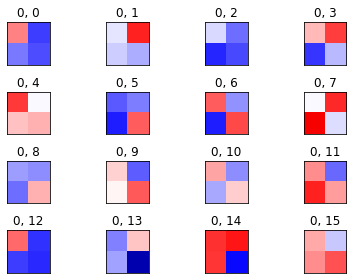

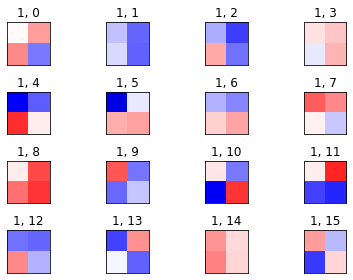

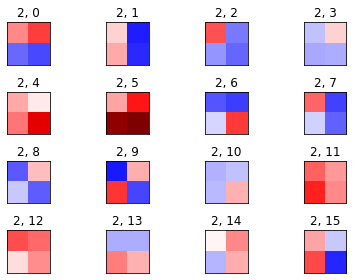

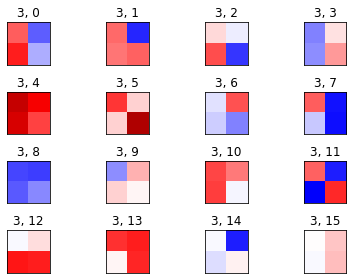

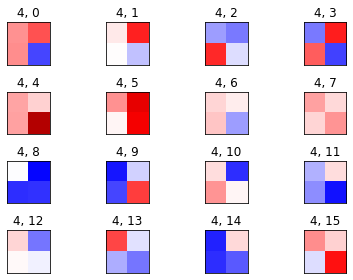

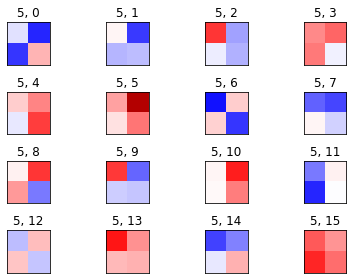

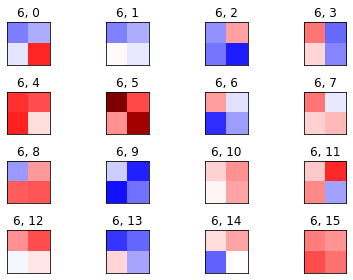

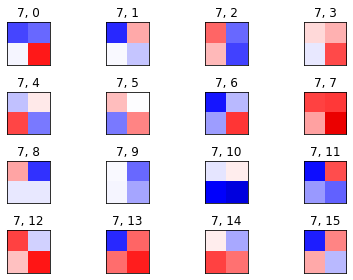

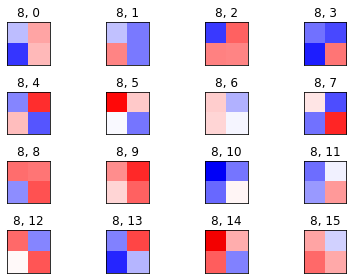

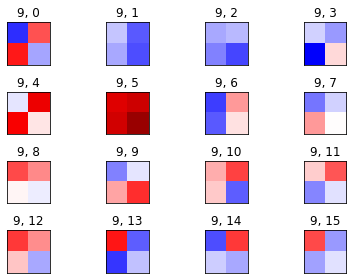

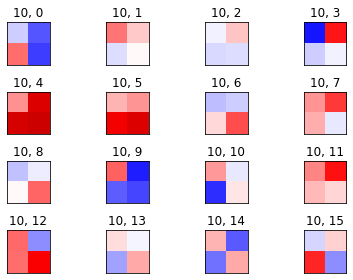

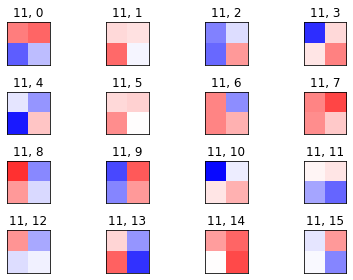

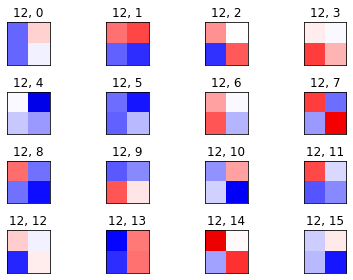

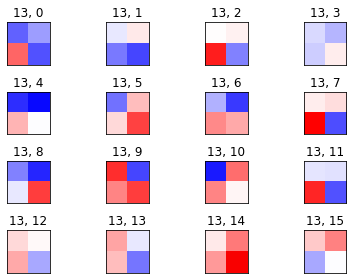

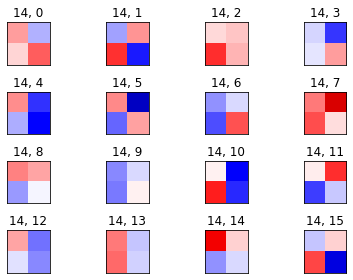

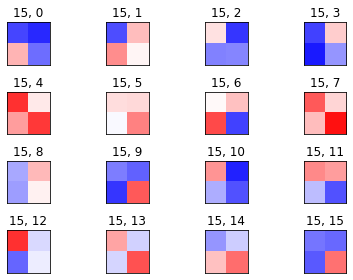

In [43]:
num_filters = conv_x2_kernel_np.shape[2]
channels = range(conv_x2_kernel_np.shape[2])
w_max = np.max(conv_x2_kernel_np)
w_min = np.min(conv_x2_kernel_np)

for channel in channels:
    # create figure and axes
    fig, axes = plt.subplots(4, 4)
    for idx, ax in enumerate(axes.flat):
        img = conv_x2_kernel_np[:, :, channel, idx]
        _ = ax.imshow(img, vmin=w_min, vmax=w_max, 
                      interpolation='nearest', cmap='seismic')
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
        _ = ax.set_title(f'{channel}, {idx}')
    fig.tight_layout()

In [ ]:

# iterate channels
for channel in channels:
    # iterate filters inside every channel
    for l, ax in enumerate(axes.flat):
        # get a single filter
        img = weights[:, :, channel, l]
        # put it on the grid
        ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
        # remove any labels from the axes
        ax.set_xticks([])
        ax.set_yticks([])
    # save figure
    plt.savefig(os.path.join(plot_dir, '{}-{}.png'.format(name, channel)), bbox_inches='tight')

[]

[]

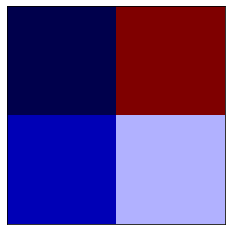

In [29]:
w0 = conv_x1_kernel_np[:, :, 0]
w_min = np.min(w0)
w_max = np.max(w0)

fig, ax = plt.subplots()
_ = ax.imshow(conv_x1_kernel_np[:, :, 0], vmin=w_min, vmax=w_max, 
          interpolation='nearest', cmap='seismic')
# remove any labels from the axes
_ = ax.set_xticks([])
_ = ax.set_yticks([])

In [ ]:
model.dynamics.position_fn.dense

In [39]:
import pickle

with open(model.files['parameters_pkl_file'], 'wb') as f:
    pickle.dump(model.params, f)

In [ ]:
model.sess.graph.collections

In [ ]:
model.sess.graph.get_collection

In [ ]:
model.dynamics.position_fn.summary()

In [ ]:
# Iterate over samples history and calculate observables for each sample.
# `lattice.calc_plaq_observables(samples)` calculates observables for each of
# the samples in the mini-batch.
actions_history = []
avg_plaquettes_history = []
top_charges_history = []
for idx, samples in enumerate(samples_history):
    t0 = time.time()
    observables = np.array(model.lattice.calc_plaq_observables(samples))
    actions, plaqs, charges = observables
    
    actions_history.append(actions)
    avg_plaquettes_history.append(plaqs)
    top_charges_history.append(charges)
    
    print(f'step: {idx}  '
          f'time / step: {time.time() - t0:^6.4g}  '
          f'avg action: {np.mean(actions):^6.4g}  '
          f'avg plaquette: {np.mean(plaqs):^6.4g} '
          f'top charge: {np.mean(charges):^6.4g}')

In [ ]:
_ = helpers.plot_run_data(model.data, 
                          model.params, 
                          model.steps_arr, 
                          model.figs_dir, 
                          skip_steps=1)

In [ ]:
#tf.reset_default_graph()
#model = GaugeModel(params=params,
#                   config=None,
#                   sess=None,
#                   conv_net=False,
#                   hmc=False,
#                   log_dir='../../gauge_logs_graph/run_25',
#                   restore=True)

In [ ]:
samples = np.random.randn(*model.samples.shape)
samples_history = []

In [ ]:
for i in range(500):
    t0 = time.time()
    samples = model.sess.run(model.x_out, feed_dict={model.x: samples})
    samples_history.append(samples)
    print(f'step: {i:^6.4g} time/step: {time.time() - t0:^6.4g}')

In [ ]:
samples_history_conv = np.array(samples_history_conv)
print(samples_history_conv.shape)

In [ ]:
import pickle
samples_history_file = os.path.join(model.info_dir, 'samples_history.pkl')
with open(samples_history_file, 'wb') as f:
    pickle.dump(samples_history_conv, f)